## III -Exploratory Analysis
### B - (Hospital Readmissions Reduction Program) HRRP Table
#### 1) Importing libraries

In [1]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
%matplotlib inline 
print("Imported all the required libraries")

Imported all the required libraries


#### 2) Querying data from the server

In [2]:
sql1 = """
SELECT * FROM "READM_30_AMI_HRRP" ;"""
sql2 = """
SELECT * FROM "READM_30_CABG_HRRP" ;"""
sql3 = """
SELECT * FROM "READM_30_COPD_HRRP" ;"""
sql4 = """
SELECT * FROM "READM_30_HF_HRRP" ;"""
sql5 = """
SELECT * FROM "READM_30_HIP_KNEE_HRRP" ;"""
sql6 = """
SELECT * FROM "READM_30_PN_HRRP" ;"""

try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "192.168.1.100",
    port = "5432",
    database = "dap_medicare")
    ami_df = sqlio.read_sql_query(sql1, dbConnection) 
    cabg_df = sqlio.read_sql_query(sql2, dbConnection) 
    copd_df = sqlio.read_sql_query(sql3, dbConnection) 
    hf_df = sqlio.read_sql_query(sql4, dbConnection) 
    hip_df = sqlio.read_sql_query(sql5, dbConnection) 
    pn_df = sqlio.read_sql_query(sql6, dbConnection)
except (Exception, psycopg2.Error) as dbError:
    print ("Error while fetching database", dbError)
finally:
    if(dbConnection): dbConnection.close()

#### 3) Descriptive Statistical Analysis

In [3]:
#heart attack (AMI)
ami_df.head()

,provider_id,hospital_name,state,measure_name,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,READM-30-AMI-HRRP,742,1.044600,15.293500,14.640400,116,2015-07-01,2018-06-30
1,10005,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,AL,READM-30-AMI-HRRP,344,0.925500,14.102400,15.237900,44,2015-07-01,2018-06-30
2,10006,NORTH ALABAMA MEDICAL CENTER,AL,READM-30-AMI-HRRP,458,0.967300,13.512200,13.968500,60,2015-07-01,2018-06-30
3,10007,MIZELL MEMORIAL HOSPITAL,AL,READM-30-AMI-HRRP,271,1.001453,15.764015,15.710386,42,2015-07-01,2018-06-30
4,10008,CRENSHAW COMMUNITY HOSPITAL,AL,READM-30-AMI-HRRP,271,1.001453,15.764015,15.710386,42,2015-07-01,2018-06-30


In [4]:
#coronary artery bypass graft surgery (CABG) 
cabg_df.head()

,provider_id,hospital_name,state,measure_name,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,READM-30-CABG-HRRP,279,1.236100,14.594300,11.806500,46,2015-07-01,2018-06-30
1,10005,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,AL,READM-30-CABG-HRRP,179,1.002192,12.809151,12.771704,24,2015-07-01,2018-06-30
2,10006,NORTH ALABAMA MEDICAL CENTER,AL,READM-30-CABG-HRRP,136,1.009600,12.325400,12.207900,17,2015-07-01,2018-06-30
3,10007,MIZELL MEMORIAL HOSPITAL,AL,READM-30-CABG-HRRP,179,1.002192,12.809151,12.771704,24,2015-07-01,2018-06-30
4,10008,CRENSHAW COMMUNITY HOSPITAL,AL,READM-30-CABG-HRRP,179,1.002192,12.809151,12.771704,24,2015-07-01,2018-06-30


In [5]:
#chronic obstructive pulmonary disease (COPD)
copd_df.head()

,provider_id,hospital_name,state,measure_name,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,READM-30-COPD-HRRP,495,1.0249,18.6162,18.1637,94,2015-07-01,2018-06-30
1,10005,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,AL,READM-30-COPD-HRRP,636,0.9028,16.1179,17.8526,95,2015-07-01,2018-06-30
2,10006,NORTH ALABAMA MEDICAL CENTER,AL,READM-30-COPD-HRRP,632,1.0018,17.8584,17.8263,113,2015-07-01,2018-06-30
3,10007,MIZELL MEMORIAL HOSPITAL,AL,READM-30-COPD-HRRP,140,1.0361,18.8096,18.1544,29,2015-07-01,2018-06-30
4,10008,CRENSHAW COMMUNITY HOSPITAL,AL,READM-30-COPD-HRRP,123,0.9728,16.2425,16.6962,18,2015-07-01,2018-06-30


In [6]:
#heart failure (HF)
hf_df.head()


,provider_id,hospital_name,state,measure_name,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,READM-30-HF-HRRP,1114,1.045300,22.377200,21.408200,252,2015-07-01,2018-06-30
1,10005,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,AL,READM-30-HF-HRRP,341,0.991100,20.391700,20.574400,69,2015-07-01,2018-06-30
2,10006,NORTH ALABAMA MEDICAL CENTER,AL,READM-30-HF-HRRP,793,0.946900,19.453900,20.545800,151,2015-07-01,2018-06-30
3,10007,MIZELL MEMORIAL HOSPITAL,AL,READM-30-HF-HRRP,79,1.074400,19.918900,18.538700,20,2015-07-01,2018-06-30
4,10008,CRENSHAW COMMUNITY HOSPITAL,AL,READM-30-HF-HRRP,427,1.001901,21.102234,21.042851,92,2015-07-01,2018-06-30


In [7]:
#hip/knee replacement (THA/TKA)
hip_df.head()

,provider_id,hospital_name,state,measure_name,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,READM-30-HIP-KNEE-HRRP,301,1.178700,5.58630,4.739200,20,2015-07-01,2018-06-30
1,10005,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,AL,READM-30-HIP-KNEE-HRRP,257,1.023200,4.88770,4.776700,13,2015-07-01,2018-06-30
2,10006,NORTH ALABAMA MEDICAL CENTER,AL,READM-30-HIP-KNEE-HRRP,399,1.184100,4.95780,4.186900,23,2015-07-01,2018-06-30
3,10007,MIZELL MEMORIAL HOSPITAL,AL,READM-30-HIP-KNEE-HRRP,269,1.126800,5.41440,4.805300,17,2015-07-01,2018-06-30
4,10008,CRENSHAW COMMUNITY HOSPITAL,AL,READM-30-HIP-KNEE-HRRP,641,1.006649,4.25932,4.223695,26,2015-07-01,2018-06-30


In [8]:
#pneumonia
pn_df.head()

,provider_id,hospital_name,state,measure_name,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,READM-30-PN-HRRP,605,1.0049,16.8059,16.7237,102,2015-07-01,2018-06-30
1,10005,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,AL,READM-30-PN-HRRP,697,0.9833,15.0773,15.3333,104,2015-07-01,2018-06-30
2,10006,NORTH ALABAMA MEDICAL CENTER,AL,READM-30-PN-HRRP,837,0.9827,15.5479,15.8209,129,2015-07-01,2018-06-30
3,10007,MIZELL MEMORIAL HOSPITAL,AL,READM-30-PN-HRRP,211,1.0590,15.3122,14.4590,36,2015-07-01,2018-06-30
4,10008,CRENSHAW COMMUNITY HOSPITAL,AL,READM-30-PN-HRRP,181,0.9610,13.3078,13.8483,22,2015-07-01,2018-06-30


#### 4) Concatenating dataframes to form one HRRP dataframe

In [9]:
hrrp_df =pd.concat([ami_df, cabg_df,copd_df,hf_df,hip_df,pn_df], ignore_index=True)
hrrp_df.head()

,provider_id,hospital_name,state,measure_name,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,READM-30-AMI-HRRP,742,1.044600,15.293500,14.640400,116,2015-07-01,2018-06-30
1,10005,MARSHALL MEDICAL CENTERS SOUTH CAMPUS,AL,READM-30-AMI-HRRP,344,0.925500,14.102400,15.237900,44,2015-07-01,2018-06-30
2,10006,NORTH ALABAMA MEDICAL CENTER,AL,READM-30-AMI-HRRP,458,0.967300,13.512200,13.968500,60,2015-07-01,2018-06-30
3,10007,MIZELL MEMORIAL HOSPITAL,AL,READM-30-AMI-HRRP,271,1.001453,15.764015,15.710386,42,2015-07-01,2018-06-30
4,10008,CRENSHAW COMMUNITY HOSPITAL,AL,READM-30-AMI-HRRP,271,1.001453,15.764015,15.710386,42,2015-07-01,2018-06-30


In [10]:
hrrp_df.shape

(19344, 11)

In [11]:
#converting measure name to factor
hrrp_df['measure_name']=hrrp_df['measure_name'].astype('category')
hrrp_df['measure_name'].values

[READM-30-AMI-HRRP, READM-30-AMI-HRRP, READM-30-AMI-HRRP, READM-30-AMI-HRRP, READM-30-AMI-HRRP, ..., READM-30-PN-HRRP, READM-30-PN-HRRP, READM-30-PN-HRRP, READM-30-PN-HRRP, READM-30-PN-HRRP]
Length: 19344
Categories (6, object): [READM-30-AMI-HRRP, READM-30-CABG-HRRP, READM-30-COPD-HRRP, READM-30-HF-HRRP, READM-30-HIP-KNEE-HRRP, READM-30-PN-HRRP]

In [12]:
# list the data types for each column
hrrp_df.dtypes

provider_id                      int64
hospital_name                   object
state                           object
measure_name                  category
number_of_discharges             int64
excess_readmission_ratio       float64
predicted_readmission_rate     float64
expected_readmission_rate      float64
number_of_readmissions           int64
start_date                      object
end_date                        object
dtype: object

In [13]:
#summary of all numerical cols
hrrp_df.describe() 

,provider_id,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions
count,19344.000000,19344.000000,19344.000000,19344.000000,19344.000000,19344.000000
mean,262195.596154,372.670802,1.003502,14.889908,14.835703,51.465829
std,162257.586241,314.118639,0.077583,5.682799,5.542949,50.429041
min,10001.000000,0.000000,0.623000,2.199400,2.799700,11.000000
25%,110110.500000,179.000000,0.969900,12.809151,12.771704,24.000000
50%,250089.000000,271.000000,1.002192,15.764015,15.710386,33.000000
75%,390117.500000,474.000000,1.029200,19.059690,19.029198,62.000000
max,670128.000000,9356.000000,2.183200,30.257900,25.697100,906.000000


In [14]:
#summary of all numerical cols
hrrp_df.describe(include=['object']) 

,hospital_name,state,start_date,end_date
count,19344,19344,19344,19344
unique,3130,51,1,1
top,ST JOSEPH HOSPITAL,TX,2015-07-01,2018-06-30
freq,42,1782,19344,19344


In [15]:
#correlation between columns
hrrp_df.corr()


,provider_id,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions
provider_id,1.000000,-0.009124,-0.033051,-0.014708,-0.007483,-0.017082
number_of_discharges,-0.009124,1.000000,-0.161090,-0.237253,-0.229552,0.669329
excess_readmission_ratio,-0.033051,-0.161090,1.000000,0.153991,-0.004290,0.083482
predicted_readmission_rate,-0.014708,-0.237253,0.153991,1.000000,0.982807,0.417853
expected_readmission_rate,-0.007483,-0.229552,-0.004290,0.982807,1.000000,0.402464
number_of_readmissions,-0.017082,0.669329,0.083482,0.417853,0.402464,1.000000


#### excess readmission ratio has a uni-modal distribution and heavy outliers along one tail

#### Grouping data by measure name


In [19]:
df_grp = hrrp_df.groupby('measure_name', axis=0).mean()
del df_grp['provider_id']
df_grp.head()

,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions
measure_name,,,,,
READM-30-AMI-HRRP,265.893921,1.002484,15.848482,15.773669,40.955955
READM-30-CABG-HRRP,179.666873,1.002872,12.819595,12.773253,23.591191
READM-30-COPD-HRRP,286.474256,1.001288,19.065513,19.032720,55.820099
READM-30-HF-HRRP,417.955025,1.002069,21.106695,21.043813,89.255893
READM-30-HIP-KNEE-HRRP,641.887407,1.010390,4.282056,4.228939,25.709988


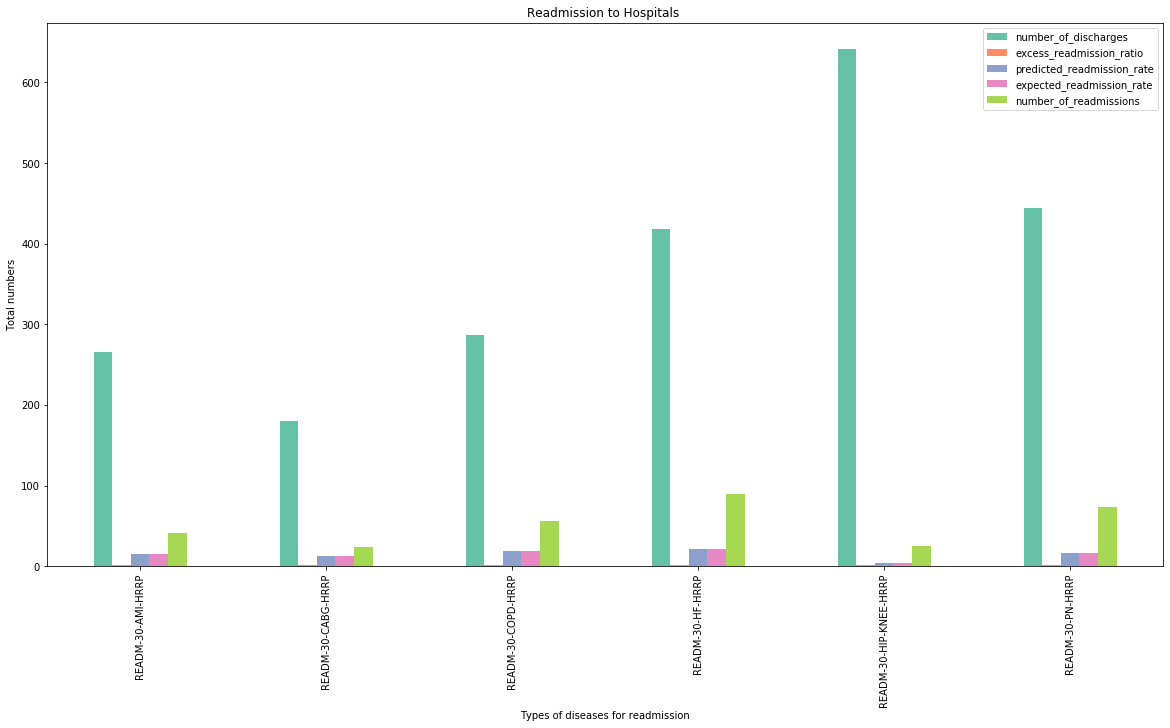

In [20]:
df_grp.plot(kind='bar', figsize=(20,10),color=sns.color_palette("Set2"))
plt.xlabel('Types of diseases for readmission') # add to x-label to the plot
plt.ylabel('Total numbers') # add y-label to the plot
plt.title('Readmission to Hospitals ') # add title to the plot
plt.show()

#### It can be inferred that number of discharges have generally outnumbered all other types across all categories but the highest number of discharges is in hip/knee surgery category

#### Grouping data by states

In [21]:
df_grp = hrrp_df.groupby('state', axis=0).mean()
del df_grp['provider_id']
df_grp.head()

,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions
state,,,,,
AK,314.187500,0.969737,13.699801,14.049521,28.958333
AL,338.878601,1.014960,14.611525,14.456034,45.845679
AR,364.989130,1.016462,14.410215,14.144712,49.275362
AZ,368.325137,0.987837,14.160759,14.370043,44.972678
CA,338.835593,1.007923,15.283887,15.142438,46.658757


In [22]:
#Top 5 states for excess readmissions
df_grp.sort_values(by='excess_readmission_ratio', ascending=False, inplace=True)
df_h_plot = df_grp.head(5)

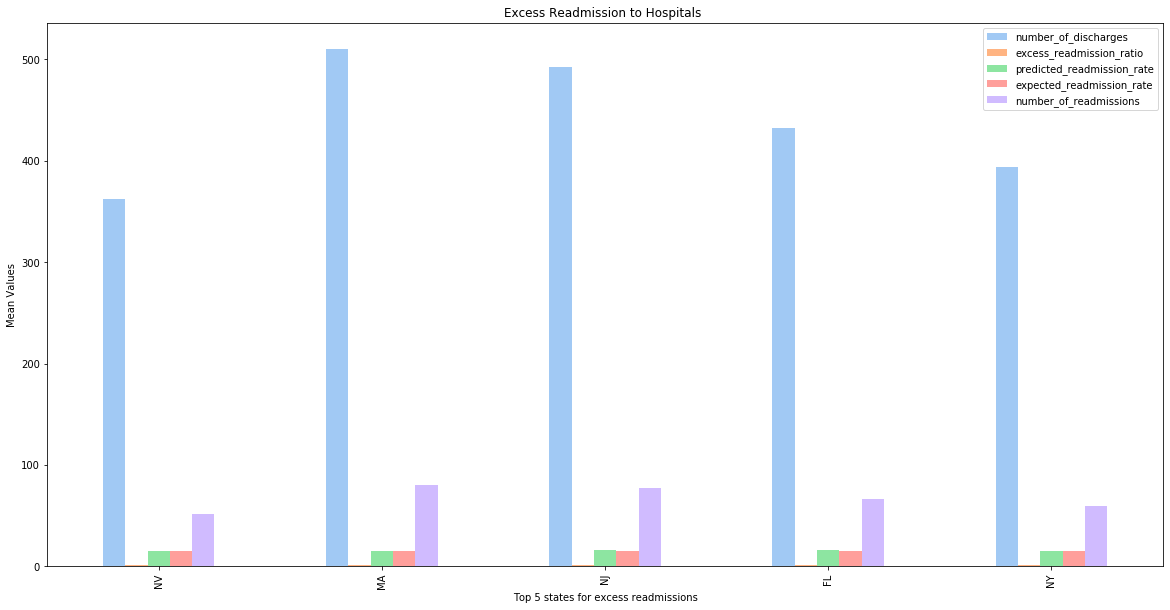

In [23]:
df_h_plot.plot(kind='bar', figsize=(20,10),color=sns.color_palette("pastel"))
plt.xlabel('Top 5 states for excess readmissions') # add to x-label to the plot
plt.ylabel('Mean Values') # add y-label to the plot
plt.title('Excess Readmission to Hospitals ') # add title to the plot
plt.show()

#### highest number of discharges  and number of readmissions is in state MA

In [24]:
#Last 5 states for excess readmissions
df_grp.sort_values(by='excess_readmission_ratio', ascending=True, inplace=True)
df_h_plot = df_grp.head(5)
df_h_plot

,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions
state,,,,,
MT,329.273810,0.952158,13.377031,13.982640,35.357143
SD,349.212963,0.960349,13.877741,14.426186,40.018519
ID,352.211111,0.961696,13.651245,14.246320,40.677778
NE,370.782609,0.963643,14.019779,14.466443,43.275362
VT,361.055556,0.964050,14.211435,14.736425,41.722222


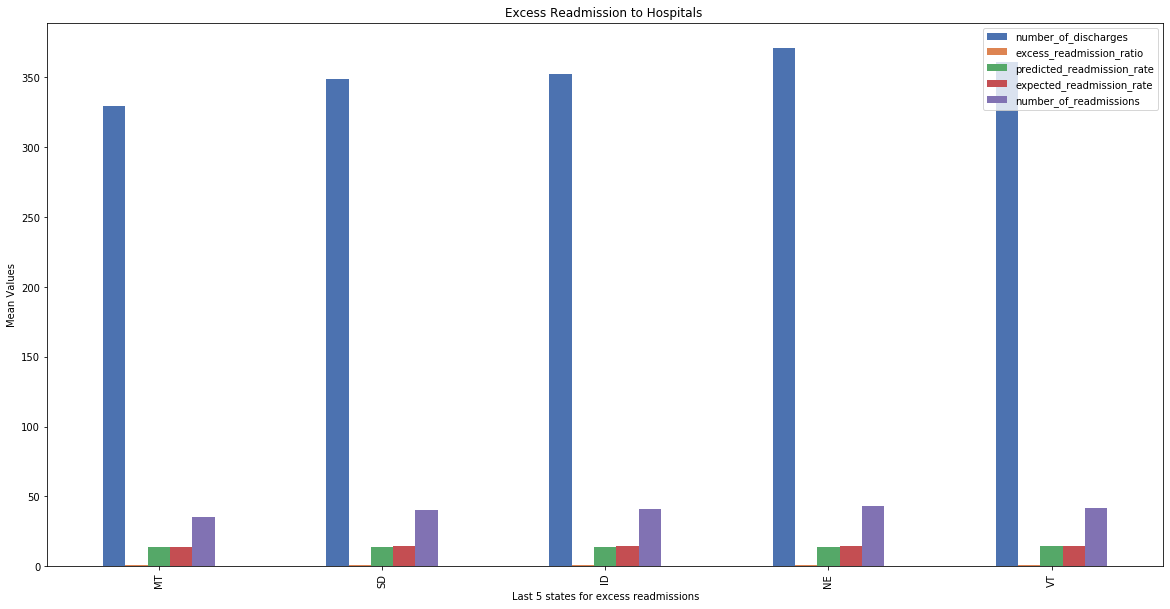

In [25]:
df_h_plot.plot(kind='bar', figsize=(20,10),color=sns.color_palette("deep"))
plt.xlabel('Last 5 states for excess readmissions') # add to x-label to the plot
plt.ylabel('Mean Values') # add y-label to the plot
plt.title('Excess Readmission to Hospitals ') # add title to the plot
plt.show()

#### excess admissions ratio is comparably low in all states